In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
#from gamap_colormap import WhGrYlRd
import xbpch
import warnings; warnings.filterwarnings("ignore")
import datetime
import cartopy.crs as ccrs
from matplotlib import dates as mdates
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
from cartopy.util import add_cyclic_point
import scipy.stats as stats

In [2]:
shuting_summit = pd.read_excel('../Accumulation_Data/Net_Accum_Shuting_042321.xlsx')

In [3]:
length_shuting = len(np.round(shuting_summit.Mid_Year).groupby(shuting_summit.Mid_Year).mean())-3
shuting_year = (shuting_summit.Mid_Year.groupby(shuting_summit.Mid_Year).mean().iloc[0:length_shuting]-0.5)
shuting_summit_accum = shuting_summit.Summit2010.groupby(shuting_summit.Mid_Year).sum().iloc[0:length_shuting]

In [4]:
shuting_summit.Mid_Year.groupby(shuting_summit.Mid_Year).mean()

Mid_Year
1750.5    1750.5
1751.5    1751.5
1752.5    1752.5
1753.5    1753.5
1754.5    1754.5
           ...  
2008.5    2008.5
2009.5    2009.5
2010.5    2010.5
2011.5    2011.5
2012.5    2012.5
Name: Mid_Year, Length: 263, dtype: float64

In [5]:
jihong_summit = pd.read_excel('../Accumulation_Data/SM07C2_Perchlorate-concentration-data_from_Jihong-email..xlsx')

In [6]:
length = np.shape(jihong_summit.kg_per_m2.groupby(jihong_summit.Year).sum()[jihong_summit.kg_per_m2.groupby(jihong_summit.Year).sum()>0])[0]-1
jihong_year = jihong_summit.Year.groupby(jihong_summit.Year).mean()[jihong_summit.kg_per_m2.groupby(jihong_summit.Year).sum()>0].iloc[1:length]
jihong_summit_annual_accum = jihong_summit.kg_per_m2.groupby(jihong_summit.Year).sum()[jihong_summit.kg_per_m2.groupby(jihong_summit.Year).sum()>0].iloc[1:length]


In [15]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(shuting_year,shuting_summit_accum)
print('slope = ',slope)
print('intercept = ', intercept)
print('pvalue = ',pvalue)
print('rvalue = ',rvalue)

slope =  0.06018612018612016
intercept =  108.36941787941791
pvalue =  0.05674044651552575
rvalue =  0.11831671989216741


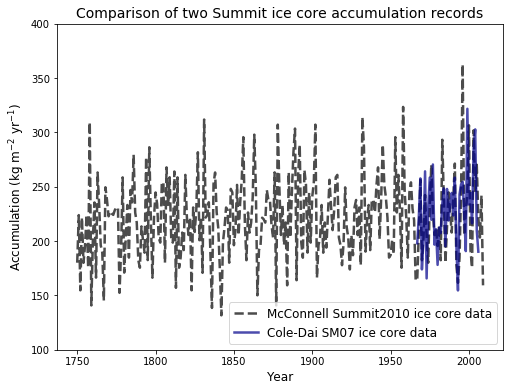

In [11]:
plt.figure(figsize=[8,6])
plt.plot(shuting_year,shuting_summit_accum,linestyle='--',linewidth=2.5,color='k',alpha=0.7,label='McConnell Summit2010 ice core data')
plt.plot(jihong_year,jihong_summit_annual_accum,linewidth=2.5,color='darkblue',alpha=0.7,label='Cole-Dai SM07 ice core data')

plt.xlabel('Year',fontsize=12)
plt.ylabel('Accumulation (kg m$^{-2}$ yr$^{-1}$)',fontsize=12)
plt.title('Comparison of two Summit ice core accumulation records',fontsize=14)
# plt.xlim([1967,2007])
plt.ylim([100,400])
plt.legend(loc='lower right',fontsize=12)

In [8]:
shuting_summit_accum_abbrev = shuting_summit_accum[1967.5:2006.5]
shuting_year_abbrev = shuting_year[1967.5:2006.5]

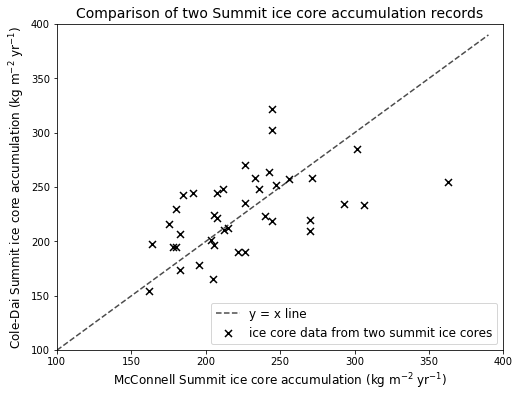

In [9]:
plt.figure(figsize=[8,6])
plt.xlabel('McConnell Summit ice core accumulation (kg m$^{-2}$ yr$^{-1}$)',fontsize=12)
plt.ylabel('Cole-Dai Summit ice core accumulation (kg m$^{-2}$ yr$^{-1}$)',fontsize=12)
plt.title('Comparison of two Summit ice core accumulation records',fontsize=14)
plt.xlim([100,400])
plt.ylim([100,400])
x1to1 = np.arange(100,400,10)
y1to1 = np.arange(100,400,10)
plt.scatter(shuting_summit_accum_abbrev,jihong_summit_annual_accum,marker='x',color='k',s=49,label='ice core data from two summit ice cores')
plt.plot(x1to1,y1to1,linestyle='--',linewidth=1.5,color='k',alpha=0.7,label='y = x line')
plt.legend(loc='lower right',fontsize=12)


In [10]:
print('Mean value of accumulation in Jihong SM07 ice core (kg m$^{-2}$ yr$^{-1}$):',np.round(np.mean(jihong_summit_annual_accum)))
print('Mean value of accumulation in Shuting Summit2010 ice core (kg m$^{-2}$ yr$^{-1}$):',np.round(np.mean(shuting_summit_accum_abbrev)))
print('Mean difference in accumulation values (kg m$^{-2}$ yr$^{-1}$):',np.round(np.mean(np.abs(shuting_summit_accum_abbrev.values -jihong_summit_annual_accum.values))))



Mean value of accumulation in Jihong SM07 ice core (kg m$^{-2}$ yr$^{-1}$): 227.0
Mean value of accumulation in Shuting Summit2010 ice core (kg m$^{-2}$ yr$^{-1}$): 225.0
Mean difference in accumulation values (kg m$^{-2}$ yr$^{-1}$): 31.0
